In [ ]:
pip install wave

  Using cached Wave-0.0.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 0
b = 1
n = 100


def trapezoidal_rule(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    fx = func(x)
    integral = 0.5 * (fx[0] + fx[-1]) + np.sum(fx[1:-1])
    integral *= h
    return integral


def my_function(x):
    return np.exp(-x**2)

result = trapezoidal_rule(my_function, -10000, 10000, 100000)
print("Result:", result)

#np.exp(-x**2) como my_function me da sqrt(pi) :)


Result: 1.7724538509055159


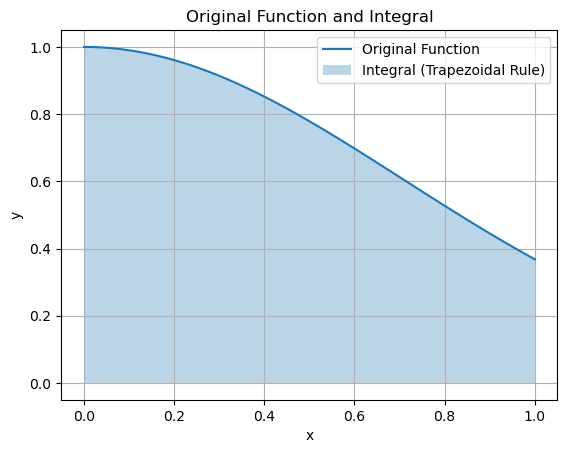

Result (Trapezoidal Rule): 1.7724538509055159


In [ ]:
#No usa la funcion trapezoide ojo

x_values = np.linspace(a, b, 100)
y_values = my_function(x_values)

# Plot the original function
plt.plot(x_values, y_values, label='Original Function')

# Plot the integral calculated using the trapezoidal rule
plt.fill_between(x_values, 0, y_values, alpha=0.3, label='Integral (Trapezoidal Rule)')
plt.title('Original Function and Integral')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Result (Trapezoidal Rule):", result)


Ejercicio 7: nucleo de Dirichlet

In [ ]:
def trapezoidal_rule_dirichlet(func, a, b, n, N):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    fx = func(x, N)
    #print(np.sum(fx))
    integral = 0.5 * (fx[0] + fx[-1]) + np.nansum(fx[1:-1])
    integral *= h
    return integral

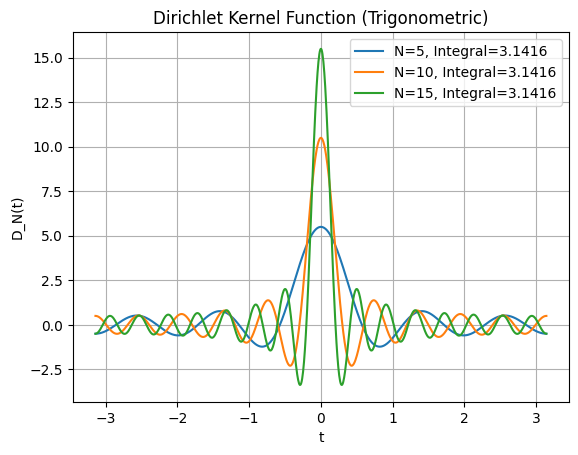

Estimated Integrals: [3.1415926535897927, 3.141592653589794, 3.141592653589794]


In [ ]:
def dirichlet_kernel_trig(t, N = 10):
    return np.sin((N + 0.5) * t) / (2 * np.sin(t / 2))


t_values = np.linspace(-np.pi, np.pi, 1000)  # Range of t values
N_values = [5, 10, 15]  # Different values of N to try

integrals = []

for N in N_values:
    # Calculate Dirichlet kernel values for current N
    dirichlet_values_trig = dirichlet_kernel_trig(t_values, N)

    # Estimate integral using the trapezoidal rule
    integral = trapezoidal_rule_dirichlet(dirichlet_kernel_trig, -np.pi, np.pi, 100, N)
    integrals.append(integral)

    plt.plot(t_values, dirichlet_values_trig, label=f'N={N}, Integral={integral:.4f}')


plt.title('Dirichlet Kernel Function (Trigonometric)')
plt.xlabel('t')
plt.ylabel('D_N(t)')
plt.legend()
plt.grid(True)
plt.show()


print("Estimated Integrals:", integrals)

Ejerciico 8

In [ ]:
def fourier_coefficient(func, n): #miro solo la n-esima iteracion (los n-esimos coeficientes)
    a = -np.pi
    b = np.pi

    a0 = trapezoidal_rule(func, a, b, 1000)

    integrand_a = lambda x: func(x) * np.cos(n * x)
    integral_a = trapezoidal_rule(integrand_a, a, b, 1000)

    integrand_b = lambda x: func(x) * np.sin(n * x)
    integral_b = trapezoidal_rule(integrand_b, a, b, 1000)
    return (integral_a / np.pi) , (integral_b / np.pi), a0

# Example usage:
def square_wave(x):
    return np.sign(np.sin(x))

N = 5  # Maximum number of coefficients

fourier_coefficients = [fourier_coefficient(square_wave, n) for n in range(N + 1)]
print("Fourier Coefficients:", fourier_coefficients)

Fourier Coefficients: [(0.0, 0.0, 0.0), (-1.7053025658242405e-16, 1.2732353559422018, 0.0), (-2.842170943040401e-17, -4.898587196589413e-19, 0.0), (-2.415845301584341e-16, 0.4244006151333576, 0.0), (1.509903313490213e-17, -2.9401426869721895e-17, 0.0), (-2.486899575160351e-16, 0.2546269646514863, 0.0)]


In [1]:
def fourier_series(a0, an, bn, x_values):
    # Initialize the Fourier series expansion with a0/2
    #print(a0)
    # a0 = integral de f entre -pi y pi dividido por pi

    series = (a0 / (2*np.pi)) * np.ones_like(x_values)

    # Add terms for each value of n
    for n, (a_n, b_n) in enumerate(zip(an, bn), start=1):
        series += a_n * np.cos(n * x_values) + b_n * np.sin(n * x_values)

    return series

In [ ]:
def calculate_series_values(func, N, x_values):
  an = []
  bn = []



  # Compute Fourier coefficients
  for n in range(1, N + 1):
      a_n, b_n, a0 = fourier_coefficient(func, n)
      an.append(a_n)
      bn.append(b_n)



  # Compute Fourier series expansion
  series_values = fourier_series(a0, an, bn, x_values)
  return series_values


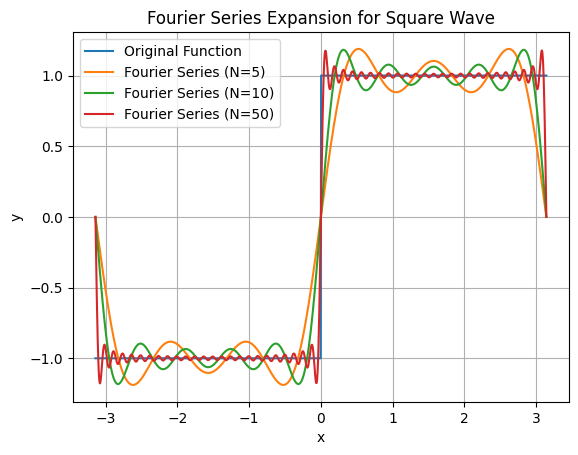

In [ ]:
x_values = np.linspace(-np.pi, np.pi, 1000)

plt.plot(x_values, square_wave(x_values), label='Original Function')
N = [5,10,50]
for n in N:
  plt.plot(x_values, calculate_series_values(square_wave, n, x_values), label=f'Fourier Series (N={n})')

plt.title('Fourier Series Expansion for Square Wave')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 9

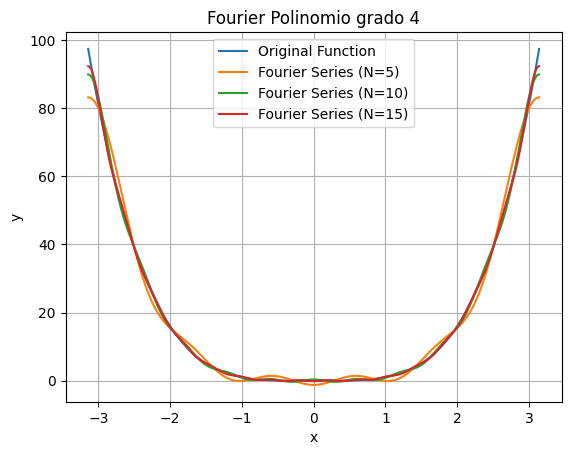

In [ ]:
def polinomio(x):
    return x**4

x_values = np.linspace(-np.pi, np.pi, 1000)

plt.plot(x_values, polinomio(x_values), label='Original Function')
N = [5,10,15]
for n in N:
  plt.plot(x_values, calculate_series_values(polinomio, n, x_values), label=f'Fourier Series (N={n})')

plt.title('Fourier Polinomio grado 4')
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim([-1,1000])
plt.legend()
plt.grid(True)
plt.show()